In [10]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

# Zad 1.
Wygeneruj dane z rozkładu normalnego o średniej m = [0, 0] i kowariancji cov = [[1, 0], [0, 1]]. 
Narysuj na jednym wykresie dane oraz gęstość rozkładu normalnego (kontury) o parametrach m = [1, 0] oraz cov = [[1, 0], [0, 2]].

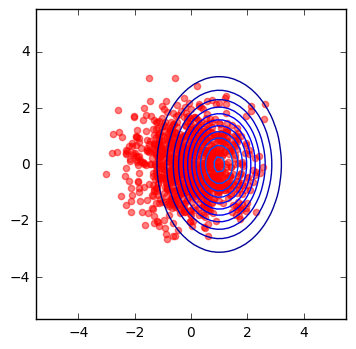

In [6]:
import matplotlib.mlab as mlab
from matplotlib import cm

mean_1 = [0, 0]
cov_1 = [[1, 0], [0, 1]] 

mean_2 = [1, 0]
cov_2 = [[1, 0], [0, 2]]

samples = np.random.multivariate_normal(mean_1, cov_1, 1000)

X = np.linspace(-5, 5, 50)
Y = np.linspace(-5, 5, 50)

X, Y = np.meshgrid(X, Y)
Z = mlab.bivariate_normal(X, Y, 
                          np.sqrt(cov_2[0][0]), np.sqrt(cov_2[1][1]),
                          mean_2[0], mean_2[1], cov_2[1][0])

plt.figure(figsize=(4, 4))
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5, color='r')
levels = np.arange(0.0, 0.5, 0.01)

_ = plt.contour(X, Y, Z, levels)

# Zad 2.
Zminimalizuj zlogarytmowaną funkcję wiarygodności dla rodziny rozkładów Split Normal Distribution [link](http://ww2.ii.uj.edu.pl/~spurek/AD_15_16/1.pdf) oraz klasycznych rozkładów normalnych. Narysuj na jednym wykresie dane oraz gęstość (kontury). 
Użyj
* danych z rozkładu jednostajnego na odcinku [-1,1] x [-1,1].
* danych z rozkładu normalnego o średniej m = [0, 0] i kowariancji cov = [[1, 0], [0, 1]].
* danych z pliku [link](http://ww2.ii.uj.edu.pl/~spurek/AD_15_16/data.txt)

[0.49234295714003179, 0.52163433754052335] [[0.080277364725936551, 0.0041805781726268997], [0.0041805781726268997, 0.083752089974408736]]
[-0.053818669131529391, 0.013126381651331856] [[1.0101916754300833, -0.026375671917224754], [-0.026375671917224754, 1.0373873400810052]]
[4.1587300704834798, 4.7704511103617779] [[0.41410046793056499, 0.15145613681556977], [0.15145613681556977, 0.49647936155320394]]


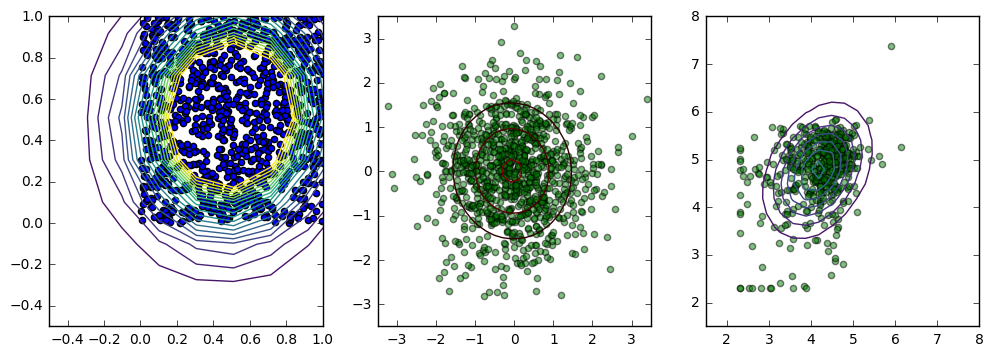

In [11]:
import pandas as pd
from scipy.optimize import minimize
from scipy.stats import multivariate_normal

X = np.random.rand(1000, 2)

samples = np.random.multivariate_normal(mean_1, cov_1, 1000)

data = pd.read_csv(r"files/data.txt", delimiter=" ", header=None)

def loglike(X, mu, sigma):    
    return np.sum(np.log(multivariate_normal.pdf(X, mu, sigma)))

mean_1 = [0, 0]
cov_1 = [[1, 0], [0, 1]]

def fit_norm(X):
    norm_params = np.array([0, 0, 1, 0, 1])
    for i in range(10000):
        candidate_params = norm_params + np.random.normal(size=5) / 100
        if(loglike(X, 
                   [candidate_params[0], candidate_params[1]], 
                   [[candidate_params[2], candidate_params[3]], [candidate_params[3], candidate_params[4]]]) >
           loglike(X, 
                   [norm_params[0], norm_params[1]], 
                   [[norm_params[2], norm_params[3]], [norm_params[3], norm_params[4]]])):
            norm_params = candidate_params
    return norm_params

plt.figure(figsize=(12, 4))


norm_params = fit_norm(X)
mean_norm = [norm_params[0], norm_params[1]]
cov_norm = [[norm_params[2], norm_params[3]], [norm_params[3], norm_params[4]]]
print(mean_norm, cov_norm)

X_ = np.linspace(-5, 5, 50)
Y = np.linspace(-5, 5, 50)
X_, Y = np.meshgrid(X_, Y)
Z = mlab.bivariate_normal(X_, Y, 
                          np.sqrt(cov_norm[0][0]), np.sqrt(cov_norm[1][1]),
                          mean_norm[0], mean_norm[1], cov_norm[1][0])
levels = np.arange(0.0, 1.0, 0.05)

plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1])
plt.contour(X_, Y, Z, levels, cmap=plt.cm.viridis)
axes = plt.gca()
axes.set_xlim([-0.5,1])
axes.set_ylim([-0.5,1])

norm_params = fit_norm(samples)
mean_norm = [norm_params[0], norm_params[1]]
cov_norm = [[norm_params[2], norm_params[3]], [norm_params[3], norm_params[4]]]
print(mean_norm, cov_norm)

X_ = np.linspace(-5, 5, 50)
Y = np.linspace(-5, 5, 50)
X_, Y = np.meshgrid(X_, Y)
Z = mlab.bivariate_normal(X_, Y, 
                          np.sqrt(cov_norm[0][0]), np.sqrt(cov_norm[1][1]),
                          mean_norm[0], mean_norm[1], cov_norm[1][0])

plt.subplot(132)
plt.scatter(samples[:, 0], samples[:, 1], c='g', alpha=0.5)
plt.contour(X_, Y, Z, levels, cmap=plt.cm.hot)
axes = plt.gca()
axes.set_xlim([-3.5, 3.5])
axes.set_ylim([-3.5, 3.5])

norm_params = fit_norm(data)
mean_norm = [norm_params[0], norm_params[1]]
cov_norm = [[norm_params[2], norm_params[3]], [norm_params[3], norm_params[4]]]
print(mean_norm, cov_norm)

X_ = np.linspace(-5, 10, 50)
Y = np.linspace(-5, 10, 50)
X_, Y = np.meshgrid(X_, Y)
Z = mlab.bivariate_normal(X_, Y, 
                          np.sqrt(cov_norm[0][0]), np.sqrt(cov_norm[1][1]),
                          mean_norm[0], mean_norm[1], cov_norm[1][0])

plt.subplot(133)
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c='g', alpha=0.5)
plt.contour(X_, Y, Z, levels, cmap=plt.cm.viridis, zorder=100)
axes = plt.gca()
axes.set_xlim([1.5, 8])
_ = axes.set_ylim([1.5, 8])

In [103]:
epsilon = np.nextafter(0, 1)
epsilon_2 = [np.nextafter(0, 1), np.nextafter(0, 1)]

@np.vectorize
def split_gauss_pdf(x, mu, sigma, tau):
    c =  1 / (sigma + tau)
    if x < mu:
        scale = sigma
    else:
        scale = tau
    return 2 * c * scale * norm.pdf(x, loc=mu, scale=scale)

def split_gauss_2d_pdf(x, y, m, W, sigma, tau):
    sigma = np.max(np.column_stack((sigma, epsilon_2)), axis=1)
    tau = np.max(np.column_stack((tau, epsilon_2)), axis=1)
    z = np.array([x - m[0], y - m[1]])
    return (W[0][0] * W[1][1] - W[0][1] * W[1][0]) * split_gauss_pdf(np.dot(W[:, 0].T, z), 0, sigma[0], tau[0]) \
            * split_gauss_pdf(np.dot(W[:, 1].T, z), 0, sigma[1], tau[1])

def loglike_split(X, m, W, sigma, tau):
    W = W.reshape(2, 2)
    return min(-epsilon, np.sum(np.log(split_gauss_2d_pdf(X[:, 0], X[:, 1], m, W, sigma, tau))))

def fit_split(X, indices):
    split_params = np.array([1, 1, 1, 0, 0, 1, 0.5, 0.5, 0.5, 0.5], dtype=float)
    for i in range(10000):
        candidate_params = split_params
        candidate_params[indices] += np.random.normal(size=len(indices))
        if(loglike_split(X,
                         split_params[:2],
                         split_params[2:6].reshape(2, 2),
                         split_params[6:8],
                         split_params[8:]) <
           loglike_split(X, 
                         candidate_params[:2],
                         candidate_params[2:6].reshape(2, 2),
                         candidate_params[6:8],
                         candidate_params[8:])):
            split_params = candidate_params
        return split_params

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: RuntimeWarning: divide by zero encountered in log


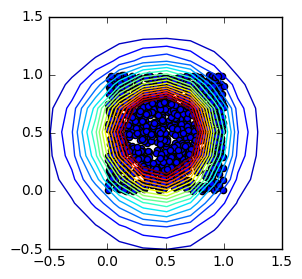

In [104]:
split_params = np.array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1], dtype=float)
mean_square = minimize(lambda p: (-1) * loglike_split(X, 
                                              p, 
                                              split_params[2:6],
                                              split_params[6:8],
                                              split_params[8:]), 
                                              split_params[:2]).x
W_square = minimize(lambda p: (-1) * loglike_split(X, 
                                              mean_square, 
                                              p,
                                              split_params[6:8],
                                              split_params[8:]), 
                                              split_params[2:6],
                                              bounds=((-1, 1), (-1, 1), (-1, 1), (-1, 1))).x
sigma_square = minimize(lambda p: (-1) * loglike_split(X, 
                                              mean_square, 
                                              W_square,
                                              p,
                                              split_params[8:]), 
                                              split_params[6:8],
                                              bounds=((0, None), (0, None))).x
tau_square = minimize(lambda p: (-1) * loglike_split(X, 
                                              mean_square, 
                                              W_square,
                                              sigma_square,
                                              p), 
                                              split_params[8:],
                                              bounds=((0, None), (0, None))).x

X_ = np.linspace(-5, 5, 50)
Y = np.linspace(-5, 5, 50)
X_, Y = np.meshgrid(X_, Y)

Z = split_gauss_2d_pdf(X_.flatten(), Y.flatten(), mean_square, W_square.reshape(2, 2), sigma_square, tau_square)
Z = Z.reshape((X_.shape[0], X_.shape[0]))

levels = np.arange(0.0, 0.9, 0.05)
plt.figure(figsize=(3, 3))
plt.scatter(X[:, 0], X[:, 1])
axes = plt.gca()
axes.set_xlim([-0.5, 1.5])
axes.set_ylim([-0.5, 1.5])
_ = plt.contour(X_, Y, Z, levels, origincmap=cm.viridis)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: RuntimeWarning: divide by zero encountered in log
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: RuntimeWarning: invalid value encountered in log


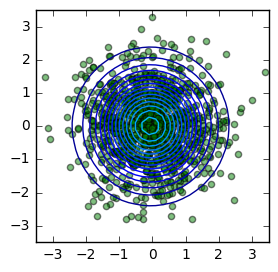

In [105]:
split_params = np.array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1], dtype=float)
mean_square = minimize(lambda p: (-1) * loglike_split(samples, 
                                              p, 
                                              split_params[2:6],
                                              split_params[6:8],
                                              split_params[8:]), 
                                              split_params[:2]).x
W_square = minimize(lambda p: (-1) * loglike_split(samples, 
                                              mean_square, 
                                              p,
                                              split_params[6:8],
                                              split_params[8:]), 
                                              split_params[2:6],
                                              bounds=((-1, 1), (-1, 1), (-1, 1), (-1, 1))).x
sigma_square = minimize(lambda p: (-1) * loglike_split(samples, 
                                              mean_square, 
                                              W_square,
                                              p,
                                              split_params[8:]), 
                                              split_params[6:8],
                                              bounds=((0, None), (0, None))).x
tau_square = minimize(lambda p: (-1) * loglike_split(samples, 
                                              mean_square, 
                                              W_square,
                                              sigma_square,
                                              p), 
                                              split_params[8:],
                                              bounds=((0, None), (0, None))).x

X_ = np.linspace(-5, 5, 50)
Y = np.linspace(-5, 5, 50)
X_, Y = np.meshgrid(X_, Y)

Z = split_gauss_2d_pdf(X_.flatten(), Y.flatten(), mean_square, W_square.reshape(2, 2), sigma_square, tau_square)
Z = Z.reshape((X_.shape[0], X_.shape[0]))
levels = np.arange(0.0, 0.5, 0.01)

plt.figure(figsize=(3, 3))
plt.scatter(samples[:, 0], samples[:, 1], c='g', alpha=0.5)
axes = plt.gca()
axes.set_xlim([-3.5, 3.5])
axes.set_ylim([-3.5, 3.5])
_ = plt.contour(X_, Y, Z, levels, origincmap=cm.viridis)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: RuntimeWarning: divide by zero encountered in log


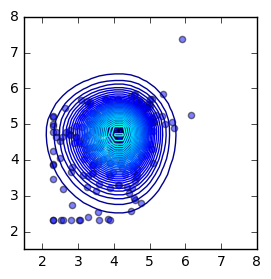

In [107]:
split_params = np.array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1], dtype=float)
mean_square = minimize(lambda p: (-1) * loglike_split(data.iloc, 
                                              p, 
                                              split_params[2:6],
                                              split_params[6:8],
                                              split_params[8:]), 
                                              split_params[:2]).x
W_square = minimize(lambda p: (-1) * loglike_split(data.iloc, 
                                              mean_square, 
                                              p,
                                              split_params[6:8],
                                              split_params[8:]), 
                                              split_params[2:6],
                                              bounds=((-1, 1), (-1, 1), (-1, 1), (-1, 1))).x
sigma_square = minimize(lambda p: (-1) * loglike_split(data.iloc, 
                                              mean_square, 
                                              W_square,
                                              p,
                                              split_params[8:]), 
                                              split_params[6:8],
                                              bounds=((0, None), (0, None))).x
tau_square = minimize(lambda p: (-1) * loglike_split(data.iloc, 
                                              mean_square, 
                                              W_square,
                                              sigma_square,
                                              p), 
                                              split_params[8:],
                                              bounds=((0, None), (0, None))).x

X_ = np.linspace(-5, 8, 60)
Y = np.linspace(-5, 8, 60)
X_, Y = np.meshgrid(X_, Y)

Z = split_gauss_2d_pdf(X_.flatten(), Y.flatten(), mean_square, W_square.reshape(2, 2), sigma_square, tau_square)
Z = Z.reshape((X_.shape[0], X_.shape[0]))
levels = np.arange(0.0, 0.8, 0.01)

plt.figure(figsize=(3, 3))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], alpha=0.5)
axes = plt.gca()
axes.set_xlim([1.5, 8])
axes.set_ylim([1.5, 8])
_ = plt.contour(X_, Y, Z, levels, origincmap=cm.viridis)

# Zad 4.
Napisz algorytm k-mean w wersji Lloyd (klasyczny). Nie można używać żadnych funkcji z k-means w pythonie.

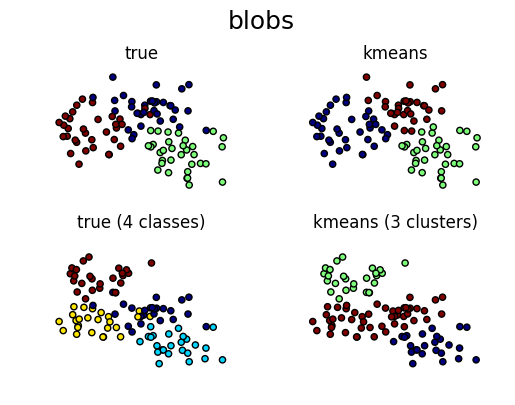

In [109]:
class kmeans(object):
    
    def __init__(self):
        
        self.labels = None
        self.clusters = None
        self.n_clusters = None
        self.cluster_centers = None

    def fit(self, X, n_clusters):
        
        n = X.shape[0]
        self.n_clusters = n_clusters
        
        # initialize cluster centers randomly
        self.cluster_centers = X[np.random.choice(n, self.n_clusters, replace=False)]
        
        # assign each point to the closest cluster
        self.labels = []
        for i in range(n):
            self.labels.append(np.argmin(np.sum((X[i] - self.cluster_centers) ** 2, axis=1)))
        
        self.clusters = [np.array([x for x in range(n) if self.labels[x] == c]) for c in range(self.n_clusters)]

        # iterate until no points get shuffled
        change = True
        while(change):
            change = False
            
            # compute new cluster averages 
            self.cluster_centers = np.array(list(map(lambda c: np.mean(X[c], axis=0), self.clusters)))

            # assign each point to the closest cluster
            for i in range(n):
                candidate = np.argmin(np.sum((X[i] - self.cluster_centers) ** 2, axis=1))
                if candidate != self.labels[i]:
                    self.labels[i] = candidate
                    change = True
                    
            self.clusters = [np.array([x for x in range(n) if self.labels[x] == c]) for c in range(self.n_clusters)]
        
        return self
    
from sklearn.datasets.samples_generator import make_blobs
X_blobs, y_blobs = make_blobs(n_samples=100, centers=3, n_features=2, random_state=0)
n_classes = len(set(y_blobs))
m = kmeans().fit(X_blobs, n_classes)

plt.suptitle("blobs" , fontsize=18, verticalalignment='bottom')

plt.subplot(221)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs)
plt.axis('off')
plt.title("true")

plt.subplot(222)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=m.labels)
plt.axis('off')
_ = plt.title("kmeans")

X_blobs, y_blobs = make_blobs(n_samples=100, centers=4, n_features=2, random_state=0)
m = kmeans().fit(X_blobs, 3)

plt.subplot(223)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs)
plt.axis('off')
plt.title("true (4 classes)")

plt.subplot(224)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=m.labels)
plt.axis('off')
_ = plt.title("kmeans (3 clusters)")